# Multiple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import norm
import statsmodels.formula.api as smf
import itertools
from statsmodels.stats.outliers_influence import variance_inflation_factor
from stats_plots import ols_reg, ols_check, pair_plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')

In [2]:
# Replace with your actual Excel path/sheet
xls = pd.ExcelFile("Six Sigma_Case Study.xlsx")
df = (
    pd.read_excel(
        xls,
        sheet_name="Regression",
        usecols = ["MR Ex Caliper Mold Diameter_1", "Ex Deslagger abrasion setting_1",
                   "Ambient Temperature", "Relative Humidity",
                   "Lub PH", "Abraizer machine"]
    )
    .dropna(how="all")  # drop rows where all columns are NaN
)
# Strip whitespace from column names
df.columns = df.columns.str.strip()

# --- Map to short variable names ---
df = df.rename(columns={
    "MR Ex Caliper Mold Diameter_1": "Y",  # response
    "Ex Deslagger abrasion setting_1": "X1",  # predictor
    "Ambient Temperature": "X2",
    "Relative Humidity": "X3",
    "Lub PH": "X4",
    "Abraizer machine": "X5"   
})
df['X5'] = df['X5'].astype('category')
df.head()

,Y,X1,X2,X3,X4,X5
0,19.500000,57.0,76.820434,80.652134,3.5,Machine A
1,20.900000,61.0,77.797680,67.474333,3.6,Machine A
2,21.200000,62.0,69.099424,37.136179,3.5,Machine A
3,21.364383,62.1,74.887451,74.240577,3.7,Machine A
4,22.224956,65.0,72.376959,65.580824,3.8,Machine A


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Y       26 non-null     float64 
 1   X1      26 non-null     float64 
 2   X2      26 non-null     float64 
 3   X3      26 non-null     float64 
 4   X4      26 non-null     float64 
 5   X5      26 non-null     category
dtypes: category(1), float64(5)
memory usage: 1.3 KB


In [4]:
# ----------------------
# Handle missing values (critical for regression)
# ----------------------
# Check for missing values in any column (not just all-NaN rows)
print("Missing values before cleaning:\n", df.isnull().sum())

# Drop rows with any missing values (or impute them if preferred)
df = df.dropna()
print("\nShape after dropping missing values:", df.shape)

# ----------------------
# Separate features (X) and target (y)
# ----------------------
X = df[["X1", "X2", "X3", "X4", "X5"]]  # All predictors (including X5)
#X = sm.add_constant(X)
y = df["Y"]  # Response variable

Missing values before cleaning:
 Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
dtype: int64

Shape after dropping missing values: (26, 6)


## First fit

In [5]:
fit_1 = ols_reg(df, x_cols=["X1", "X2", "X3", "X4", "X5"], y_col="Y", categorical = ["X5"])

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     899.0
Date:                Wed, 12 Nov 2025   Prob (F-statistic):           8.20e-23
Time:                        10:36:44   Log-Likelihood:                 25.624
No. Observations:                  26   AIC:                            -39.25
Df Residuals:                      20   BIC:                            -31.70
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.2916      0

- First determine if there are any VIF's greater than 5.
- If yes, take out the highest (one at a time) and rerun the model. However, in this case, given the abrasion setting is controllable and Lub pH less so, the Lub pH will be removed from the model (X4) ($\textrm{Note: Actual Process related physical knowledge behind scene is very important}$). The next step will illustrate model reduction.
- VIF is variace inflation factor and gives an indication whether there is multicollinearity between two variables (or two factors essentially measuring the same thing). The model outcomes won't be reliable if there is multicollinearity.

## Second fit, model reduction after removing X4

In [6]:
fit_2 = ols_reg(df, x_cols=["X1", "X2", "X3", "X5"], y_col="Y", categorical = ["X5"])

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     1106.
Date:                Wed, 12 Nov 2025   Prob (F-statistic):           4.36e-24
Time:                        10:36:44   Log-Likelihood:                 24.788
No. Observations:                  26   AIC:                            -39.58
Df Residuals:                      21   BIC:                            -33.29
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.4741      0

- Now note that no VIF is greater than 5, so we can continue our model reduction based on predictor coefficient P-values.
- Note the highest predictor P-value that exceeds alpha 0.05 is 0.818 (for ambient temperature, X2)
- Like the prior step, remove ambient temperature (X2) from the model and rerun the analysis.

## Third fit, model reduction after removing X2.

In [7]:
fit_3 = ols_reg(df, x_cols=["X1", "X3", "X5"], y_col="Y", categorical = ["X5"])

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1541.
Date:                Wed, 12 Nov 2025   Prob (F-statistic):           1.04e-25
Time:                        10:36:44   Log-Likelihood:                 24.754
No. Observations:                  26   AIC:                            -41.51
Df Residuals:                      22   BIC:                            -36.48
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.3443      0

- Next remove Abraizer machine (X5), which has the highest P-value greater than 0.05

## Fourth fit, model reduction after removing X5.

In [8]:
fit_4 = ols_reg(df, x_cols=["X1", "X3"], y_col="Y", categorical = ["X5"])

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     2393.
Date:                Wed, 12 Nov 2025   Prob (F-statistic):           2.07e-27
Time:                        10:36:44   Log-Likelihood:                 24.628
No. Observations:                  26   AIC:                            -43.26
Df Residuals:                      23   BIC:                            -39.48
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1548      0.353     -0.438      0.6

- Next remove humidity (X3).
- Interestingly, the model is reducing to a single predictor in this example.

## Fifth fit, model reduction after removing X3

In [9]:
fit_5 = ols_reg(df, x_cols=["X1"], y_col="Y")

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     4875.
Date:                Wed, 12 Nov 2025   Prob (F-statistic):           3.08e-29
Time:                        10:36:44   Log-Likelihood:                 24.316
No. Observations:                  26   AIC:                            -44.63
Df Residuals:                      24   BIC:                            -42.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0727      0.333     -0.219      0.8

### Final reduced model
- The remaining factor, abration setting ,ahs a significant coefficient, given the P-value is less than 0.05.
- The R-Sq is high (unusually high$-$expect to see this in practice). This indicates 99.49% of the variation in mold diameter is predicted by variation in teh deslagger setting.
- WHen two or more predictors remain significant, use R-sq (adj). As predictors are added to the model, R-sq will increase, and R-sq (adj) compensates for that.

### Check assumptions (see the graph below)
- Assumptions must be met to consider the regression valid.
- Normal probability plot: Residuals must be normally distributed (residuals are the differences between the actual and predicted values). P-value > 0.05, so meets assumption.
- Versus fits: The predicted (fitted) values must show a random pattern versus residuals: 
Meets assumption.
- Versus order: The residuals must show a random pattern in the order of observation: 
Meets assumption.

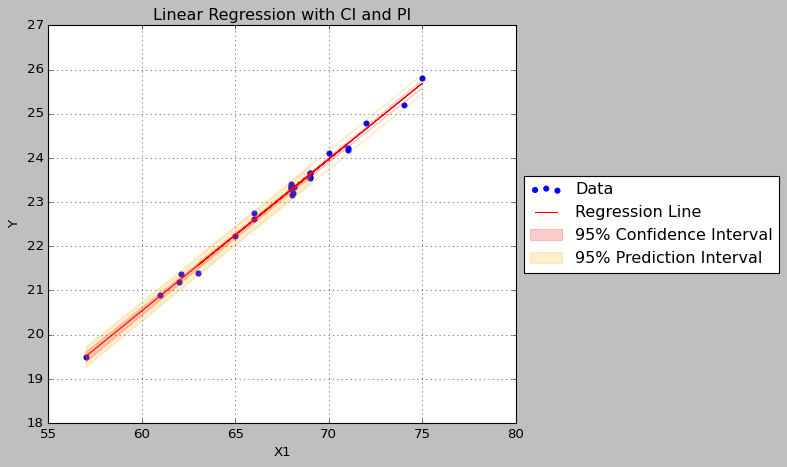

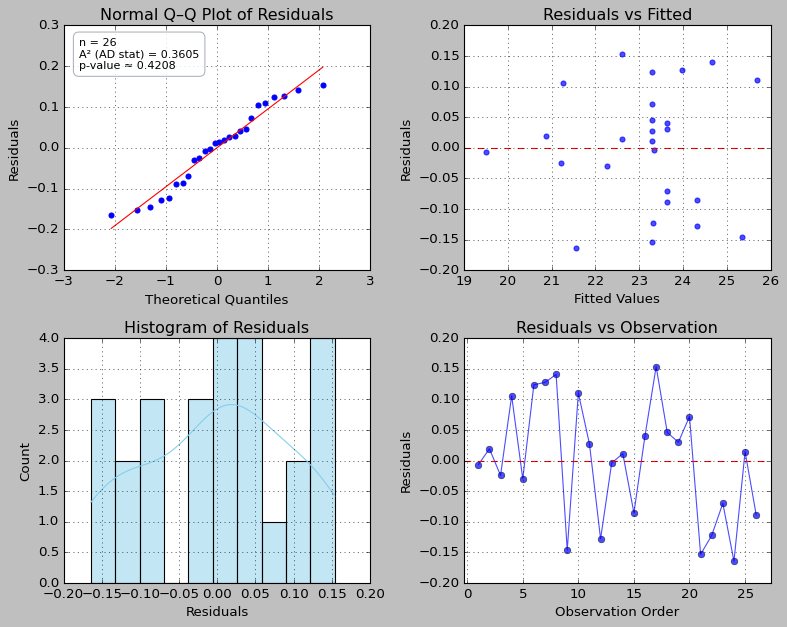

In [10]:
ols_check(fit_5["model"], fit_5["df_out"], x_col="X1", y_col="Y")

## Key learnings
- The Abraizer machine is not significant$—$Issues with the mold diameter are occurring when either are used.
- Environmental conditions are not predictive.
- But what about lubricant pH? This might be worth pursuing more. After reviewing this with a chemist, it was determined that in some instances heat can affect pH of this type of lubricant.
- That is, the stronger the abrasion force, the more the heat and the higher the pH. This is confirmed although there is a concern with non-normal residuals.
- However, this is really measuring the same thing$—$Abrasion setting, and the effect of the lubricant was ruled out.

## Dealing with non-normal residuals
- In this example, the assumption for normally distributed residuals was met, but sometimes that is not the case.
- See the 4-in-1 plot below to illustrate a situation where the residuals are not normal. Imagine if we had seen this relationship between Lub pH and Deslagger setting (different than the prior example but shown to illustrate a point).
- Should this occur.
  - First confirm the point is valid. If so, you must leave it in.
  - If you leave it in, do a data transformation of the Y, X, or both. This requires trial and error.
  - In this case the point was determined to be an error in data entry and was removed.

## Correlation

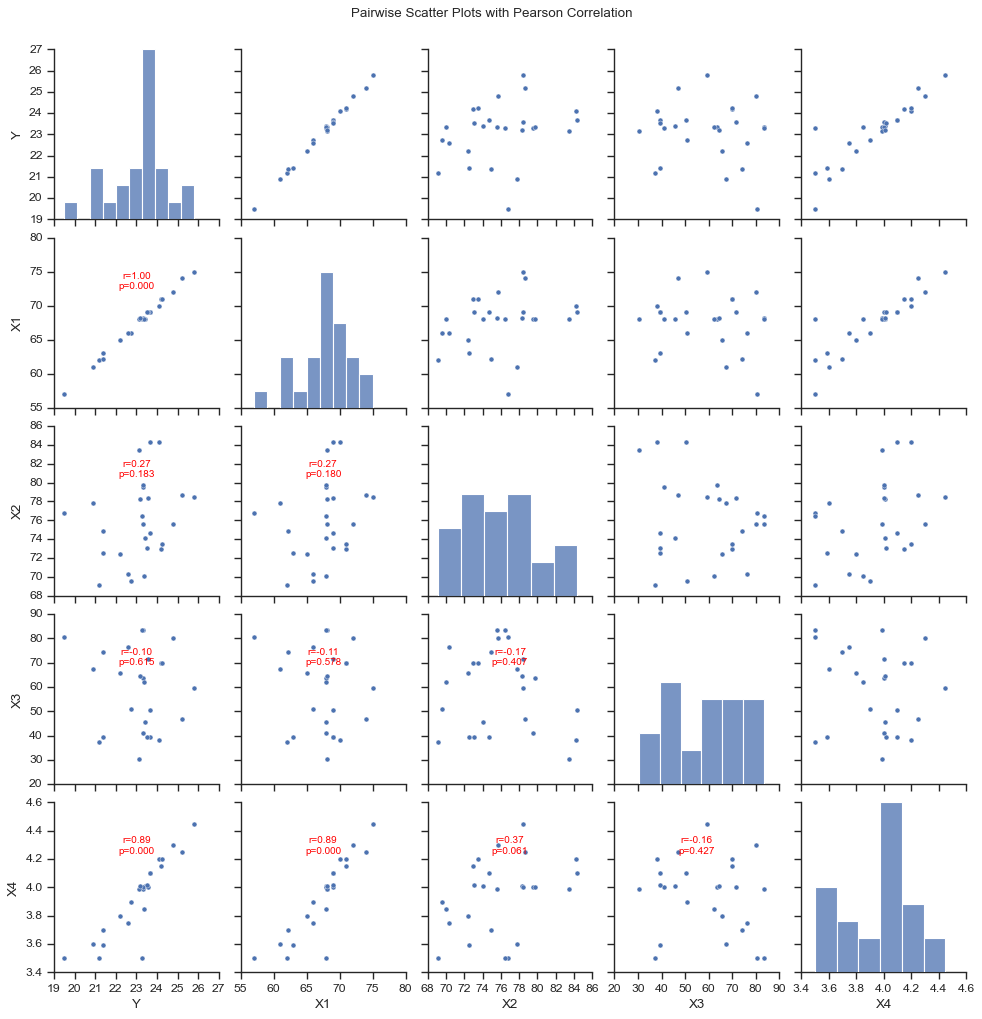

,Variable 1,Variable 2,Pearson r,p-value,CI lower,CI upper
0,Y,X1,0.998,0.000,0.994,0.999
1,Y,X2,0.269,0.183,-0.132,0.595
2,Y,X3,-0.103,0.615,-0.472,0.296
3,Y,X4,0.893,0.000,0.773,0.951
4,X1,X2,0.272,0.180,-0.129,0.596
5,X1,X3,-0.114,0.578,-0.481,0.286
6,X1,X4,0.888,0.000,0.763,0.949
7,X2,X3,-0.170,0.407,-0.523,0.233
8,X2,X4,0.373,0.061,-0.017,0.664
9,X3,X4,-0.163,0.427,-0.517,0.240


In [11]:
corr_table = pair_plot(df)
corr_table

### Interpreting the results
 - Note the first value correlation column: The closer to $\pm$1, the stronger the relationship.
 - $+$ indicates and direct relationship
 - $-$ indicates inverse relationship
 - When the P-value < 0.05, it indicates that the correlation is significant.

### Matrix graph
 - Automatically generates in Minitab V20.
 - For Minitab V18 (or to manually generate), go to Minitab path: Graph/Matrix Plot.
 - Appears to be a relationship between lube pH and abrasion settings to caliper mold diameter.
 - Appears to be relationship between Lube pH and the abrasion setting—Later determined the heat of abrasion affects pH.